# one sample z-test & one sample t-test

The purpose of this notebook is to implement a one sample z-test and a one sample t-test, in order to demonstrate the mechanics of running such tests in python, using [scipy](https://www.scipy.org/) and [statsmodels](https://www.statsmodels.org/).

#### Q: What's the difference between a Z-test and a t-test? Under which circumstances should I use one over the other?

*Taken from from https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/*:

*Z-Tests can be employed when:*
- We know the population variance, or
- We do not know the population variance but our sample size is large n ≥ 30

*z-Test Equation:*
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-04-11-06-38.png" />


*t-tests are a statistical way of testing a hypothesis when:*
- We do not know the population variance
- Our sample size is small, n < 30


*t-Test Equation:*
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-04-15-11-01.png" />


*Nifty flow-chart for which test to use when*:
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-04-15-29-37.png" />

In [1]:
import pandas as pd
import io
import requests
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

pd.options.display.max_columns = 50

### Get some sample data

In [80]:
# for CSV
url_data = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/diabetes.csv"
r = requests.get(url_data).content
df = pd.read_csv(io.StringIO(r.decode('utf-8')))
df.head(10)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
5,1008,248.0,94,69.0,3.6,4.81,Buckingham,34,male,71.0,190.0,large,132.0,86.0,NaN,NaN,36.0,42.0,195.0
6,1011,195.0,92,41.0,4.8,4.84,Buckingham,30,male,69.0,191.0,medium,161.0,112.0,161.0,112.0,46.0,49.0,720.0
7,1015,227.0,75,44.0,5.2,3.94,Buckingham,37,male,59.0,170.0,medium,NaN,NaN,NaN,NaN,34.0,39.0,1020.0
8,1016,177.0,87,49.0,3.6,4.84,Buckingham,45,male,69.0,166.0,large,160.0,80.0,128.0,86.0,34.0,40.0,300.0
9,1022,263.0,89,40.0,6.6,5.78,Buckingham,55,female,63.0,202.0,small,108.0,72.0,NaN,NaN,45.0,50.0,240.0


## One Sample Inference

In [81]:
# let's do inference using blood pressure measurements
sample = df['bp.1d'].dropna().values

In [82]:
test_value = 80 # this is the value for the "population mean" we're going to test against

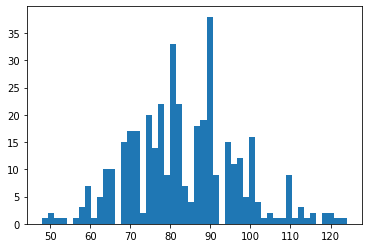

In [84]:
# let's plot a histogram of the data just to see what we're dealing with
plt.hist(sample, bins=50);

In [85]:
print(sample.mean())

83.321608040201


Looks some-what normal to me.

In [86]:
n_samples = len(sample)
print(n_samples)

398


We don't know the population variance (since we're trying to make an inference about a larger population via this study) but our sample size is large (n>=30), so using a Z-test is valid.

### Z-Test

In [87]:
# Hypotheses:
# H0: sample mean (83.32) <= 80
# H1: sample mean (83.32) > 80

from statsmodels.stats.weightstats import ztest
statistic, pvalue = ztest(x1=sample, 
                          value=test_value, 
                          alternative='larger')

print(statistic, pvalue)

4.876353350758522 5.403247963836895e-07


p-value is < 0.05, meaning we can reject the null hypothesis and accept the alternative - that the sample mean is > 80.

### t-Test

We can also use a t-test, which should give very similar results, since the degrees of freedom is so large (n_samples - 1), so the t distribution resembles a standard normal distribution.

In [104]:
# let's demonstrate that t distribution resembles standard normal distribution for our sample size
dof = n_samples - 1
x = np.linspace(start=-5, stop=5, num=1000)

# first create pdf of t distribution with n_samples - 1 dof (degrees of freedom)
t = scipy.stats.t
rv_t = t(dof)

# let's create pdf of standard normal distribution
norm = scipy.stats.norm
rv_n = norm(loc=0, scale=1)

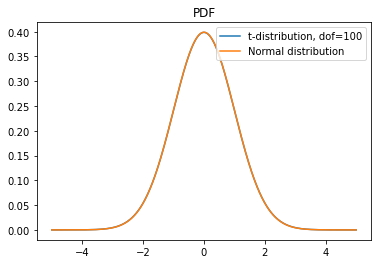

In [132]:
plt.plot(x, rv_t.pdf(x), label=f't-distribution, dof={dof}');
plt.plot(x, rv_n.pdf(x), label=f'Normal distribution');
plt.legend()
plt.title('PDF');

As we can see they overlap completely.

What about the PDF of t distributions with different degrees of freedom?

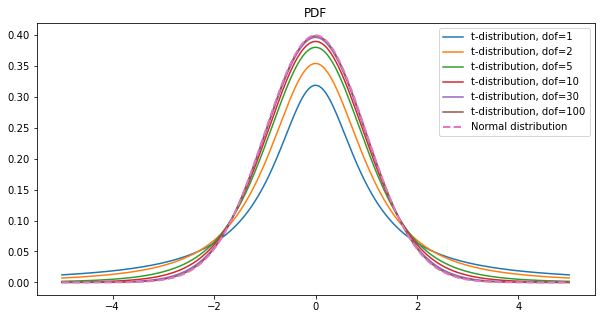

In [133]:
plt.figure(figsize=(10,5));
pdf_t = []
for dof in [1,2,5,10,30,100]:
    rv = t(dof)
    plt.plot(x, rv.pdf(x), label=f't-distribution, dof={dof}');
plt.plot(x, rv_n.pdf(x), label=f'Normal distribution', ls='--', lw=2);
plt.legend();
plt.title('PDF');

So the PDF of the t-distribution with dof=30 almost completely matches the PDF of the standard normal distribution.

Look at CDF briefly:

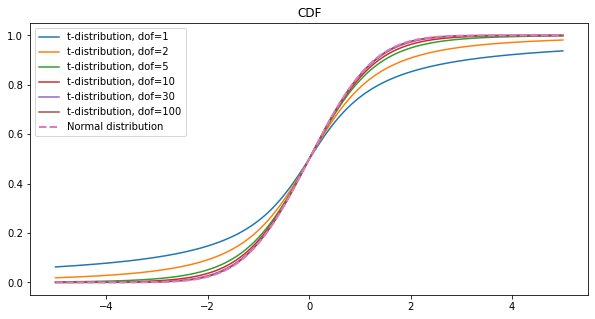

In [134]:
plt.figure(figsize=(10,5));
cdf_t = []
for dof in [1,2,5,10,30,100]:
    rv = t(dof)
    plt.plot(x, rv.cdf(x), label=f't-distribution, dof={dof}');
plt.plot(x, rv_n.cdf(x), label=f'Normal distribution', ls='--', lw=2);
plt.legend();
plt.title('CDF');

#### Calculate t statistic to test the hypothesis that the sample mean is greater than a given population mean

In [79]:
# Hypotheses:
# H0: sample mean (83.32) <= 80
# H1: sample mean (83.32) > 80

# calculate test statistic using equation from above
statistic = (sample.mean() - test_value) / (sample.std() / np.sqrt(n_samples))
print(f"test statistic={statistic}")

# use test statistic to calculate a p-value for this ons sided t-test
dof = n_samples - 1 # calculate degrees of freedom

rv = scipy.stats.t # instantiate A Student’s t continuous random variable

# calculate p-value from CDF using our statistic
pvalue = 1 - rv.cdf(statistic, dof)

print(f"pvalue={pvalue}")

test statistic=4.882490991137169
pvalue=7.604355871659862e-07


With p < 0.05, we can reject the null at the 95% confidence level (1-95 = 0.05) and accept the alternative hypothesis that the sample represents a population with a mean that is LARGER than the hypothetical population (that has a mean value of 80).

#### use two-sided one sample t-test function to checking for whether the mean of the sample significantly differs from a given population mean

In [135]:
# Hypotheses:
# H0: sample mean = population mean
# H1: sample mean < population mean | sample mean > population mean

statistic, pvalue = scipy.stats.ttest_1samp(a=sample, popmean=test_value)

print(f"test statistic={statistic}")
print(f"pvalue={pvalue}")

test statistic=4.876353350758522
pvalue=1.566173764815852e-06


With p < 0.05, we can reject the null at the 95% confidence level (1-95 = 0.05) and accept the alternative hypothesis that the sample represents a different population than the hypothetical population with a mean value of 80.